<html>
<head>
	<title></title>
</head>
<body>
<h2 style="text-align: center;line-height: 120%;">ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ «МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ» Кафедра «РЗиАЭ»</h2>
<h2 style="text-align: center;line-height: 20%;">Лабораторная работа №2</h2>
<h3 style="text-align: center;line-height: 20%;">по курсу: «Методы решения задач оптимизации»</h3>

<h2 style="text-align: center;line-height: 80%;"><em>Градиентные методы</em></h2>

<h4 style="text-align: center;line-height: 80%;"><em>Вариант №5</em></h4>

<h5 style="text-align: right;line-height: 40%;">Выполнил: студент группы Э-13м-21</h5>
<h5 style="text-align: right;line-height: 40%;">Груздов А.Г.</h5>

<h5 style="text-align: right;line-height: 40%;">Принял: Рогозинников Е.И.</p>
<h5 style="text-align: right;line-height: 40%;">Рыжков А.К.</p>
<h4 style="text-align: center;line-height: 100%;"><em> Москва, 2022</em></h3>
</body>
</html>

In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


class Gradient:
    max_iter = 10000  #максимальное число итераций
    ##  Вариант 1 ###
    # rate = 0.01  #шаг сходимости
    # epsilon = 0.00001  #точность
    ###  Вариант 2 ###
    # rate = 0.001  #шаг сходимости
    # epsilon = 0.00001  #точность
    ###  Вариант 3 ###
    rate = 0.01  #шаг сходимости
    epsilon = 0.001  #точность
    iter = 0  #номер итерации
    lambd = 0.1
    alpha = 0.999
    delta = 0.01
    Delta = 0.01

    def f_n2(W_0):  # Целевая функция по задаче выпуклого программирования
        F_n3 = (W_0[0] - 1) ** 4 + (W_0[1] - 2) ** 2 + W_0[0] ** 3
        return F_n3

    def gradient_n2(W_0):  # Поиск градиента
        # Нахождение производных функции относительно W_1-W_2
        D_1 = 4 * (W_0[0] - 1) ** 3 + 3 * W_0[0] ** 2
        D_2 = 2 * (W_0[1] - 2)
        Grad_W = np.array([D_1, D_2])
        return Grad_W

    def plt_Gradient(x_0, y_1, iter, title: str):
        # Plotting
        xval = np.linspace(-6, 8, iter)
        yval = np.linspace(-6, 8, iter)
        x, y = np.meshgrid(xval, yval)
        z = []
        for i in range(iter):
            z.append(Gradient.f_n2([x[i], y[i]]))

        # Построение наборов уровней
        fig, ax = plt.subplots()

        ###  Строим contourf  ###
        #  Задаем количество областей:
        lev_region = [0, 1, 2, 3, 4, 6, 10, 20, 40, 100, 900, 10000]
        #  Задаем цвет каждой области:
        color_fill = np.zeros((12, 3))
        color_fill[:, 1:] = 0.1
        color_fill[:, 0] = np.linspace(0, 1, 12)
        ax.contourf(x, y, z,
                    levels=lev_region,
                    colors=color_fill)

        ###  Строим contour - линии уровня ###
        #  Задаем количество линий:
        lev_line = [1, 2, 3, 6, 20, 50]
        #  Задаем цвет линий:
        color_line = np.zeros((6, 3))
        color_line[:, 1:] = 0.8
        color_line[:, 0] = np.linspace(1, 0, 6)

        CS = ax.contour(x, y, z,
                        levels=20,
                        colors=color_line)
        ax.clabel(CS, inline=True, fontsize=10)
        ax.set_title(f"${title}$")
        plt.xlabel(r'$minf(W) = (W_1-1)^4+(W_2-2)^2+W_1^3$')
        # Оси координат
        plt.vlines(0, -15, 15, color="black")
        plt.hlines(0, -15, 15, color="black")
        #  ширина и высота "Figure"
        fig.set_figwidth(8)
        fig.set_figheight(8)
        plt.axis((-5, 8, -5, 8))

        # Plotting the triangles
        plt.plot(x_0, y_1, label="Линия спуска")

        # Minimum
        plt.scatter(x_0[iter - 1], y_1[iter - 1],
                    marker='o',
                    c="red",
                    edgecolors='black',
                    label="Минимальное значение",
                    alpha=0.6)
        plt.legend()
        plt.show()

In [74]:
class Gradient_Classic(Gradient):
    def gradient_classic(self):
        """
        @:doc "Функция расчёта градиента классическим методом
       ========================================================
        :return: возвращает массив с рассчитанными параметрами
        """
        W = np.random.rand(2)  # Инициализация вектора искомых параметров W случайными числами от 0 до 1
        x = [W[0]]  # Массив координаты x для построения графика
        y = [W[1]]  # Массив координаты y для построения графика
        W_prev = np.array([2, 2])  # Начальный вектор параметров для предыдущей итерации
        for i in range(self.max_iter + 1):  # цикл для расчета вектора искомых параметров
            # Выхода из цикла при условии: 	разница между предыдущими значениями W и текущими будет меньше epsilon;
            if (np.absolute(np.linalg.norm(W - W_prev)) <= self.epsilon):
                print(f"Решение найдено,{i + 1} итераций")
                break
            # Выхода из цикла при условии: 	количество итераций достигает значения max_iter (решение не найдено).
            if (i == self.max_iter):
                print(f"Решение за {i + 1} не найдено")
                print(f"Точность решения за {i + 1} итераций = ", np.absolute(np.linalg.norm(W - W_prev)))
                break

            W_prev = W  #Присваиваем переменной значение на предыдущей итерации текущим
            W = W - self.rate * Gradient.gradient_n2(W)  #Градиентный шаг
            x.append(W[0])
            y.append(W[1])
            self.iter = i  # Записываем значение текущей итерации
        return W, x, y, len(x)

Решение найдено,176 итераций

=======================Расчет Классическим методом=======================

Найденный вектор параметров по Классическому градиентному методу [0.45921271 1.95176787]
Минимум целевой функции 0.1846909461481817


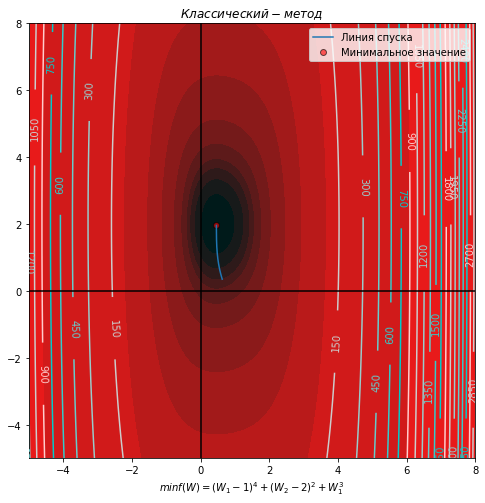

In [75]:
classic = Gradient_Classic()
w, x, y, i = classic.gradient_classic()
print("\n=======================Расчет Классическим методом=======================\n")
print(f"Найденный вектор параметров по Классическому градиентному методу {w}")
print(f"Минимум целевой функции {Gradient.f_n2(w)}")
if (i < Gradient.max_iter):
    Gradient.plt_Gradient(x, y, i, "Классический-метод")

In [52]:
class Gradient_Momentum(Gradient):
    def gradient_Momentum(self):
        """
        @:doc "Функция расчёта градиента методом Momentum
       ========================================================
        :return: возвращает массив с рассчитанными параметрами
        """
        W = np.random.rand(2)  # Инициализация вектора искомых параметров W случайными числами от 0 до 1
        x = [W[0]]  # Массив координаты x для построения графика
        y = [W[1]]  # Массив координаты y для построения графика
        V = np.random.rand(2)  # Инициализация промежуточного вектора V случайными числами от 0 до 1
        W_prev = np.array([10, 10])  # Начальный вектор параметров для предыдущей итерации
        gamma = 1 - self.lambd  # Дисконтирующий множитель позволяет сохранить некоторый небольшой «хвост». lambda - темп забывания;
        eta = (1 - gamma) * self.rate  #
        for i in range(self.max_iter):  # цикл для расчета вектора искомых параметров
            # Выхода из цикла при условии: разница между предыдущими значениями W и текущими будет меньше epsilon;
            if (np.absolute(np.linalg.norm(W - W_prev)) <= self.epsilon):
                print(f"Решение найдено,{i + 1} итераций")
                break
            # Выхода из цикла при условии: 	количество итераций достигает значения max_iter (решение не найдено).
            if (i == self.max_iter - 1):
                print(f"Решение за {i + 1} не найдено")
                print(f"Точность решения за {i + 1} итераций = ", np.absolute(np.linalg.norm(W - W_prev)))
                break
            W_prev = W  #Присваиваем переменной значение на предыдущей итерации текущим
            V = gamma * V + eta * Gradient.gradient_n2(W)  # Расчет промежуточного значения
            W = W_prev - V  # Градиентный шаг
            x.append(W[0])
            y.append(W[1])
            self.iter = i  # Записываем значение текущей итерации
        return W, x, y, len(x)

Решение найдено,194 итераций

=======================Расчет методом Momentum=======================

Найденный вектор параметров по градиентному методу Momentum [0.45920517 1.96360798]
Минимум целевой функции 0.18368898692544952


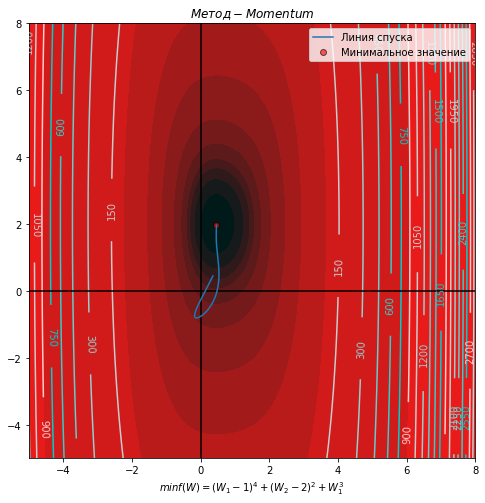

In [53]:
momentum = Gradient_Momentum()
w, x, y, i = momentum.gradient_Momentum()
print("\n=======================Расчет методом Momentum=======================\n")
print(f"Найденный вектор параметров по градиентному методу Momentum {w}")
print(f"Минимум целевой функции {Gradient.f_n2(w)}")
if (i < Gradient.max_iter):
    Gradient.plt_Gradient(x, y, i, "Метод-Momentum")

In [54]:
class Gradient_NAG(Gradient):
    def gradient_NAG(self):
        """
        @:doc "Функция расчёта градиента методом NAG
       ========================================================
        :return: возвращает массив с рассчитанными параметрами
        """
        W = np.random.rand(2)  # Инициализация вектора искомых параметров W случайными числами от 0 до 1
        x = [W[0]]  # Массив координаты x для построения графика
        y = [W[1]]  # Массив координаты y для построения графика
        V = np.random.rand(2)  # Инициализация промежуточного вектора V случайными числами от 0 до 1
        W_prev = np.array([10, 10])  # Начальный вектор параметров для предыдущей итерации
        gamma = 1 - self.lambd  # Дисконтирующий множитель позволяет сохранить некоторый небольшой «хвост».  lambda -темп забывания;
        eta = (1 - gamma) * self.rate  # rate-темп обучения
        for i in range(self.max_iter):  # цикл для расчета вектора искомых параметров
            # Выхода из цикла при условии: разница между предыдущими значениями W и текущими будет меньше epsilon;
            if (np.absolute(np.linalg.norm(W - W_prev)) <= self.epsilon):
                print(f"Решение найдено,{i + 1} итераций")
                break
            # Выхода из цикла при условии: количество итераций достигает значения max_iter (решение не найдено).
            if (i == self.max_iter - 1):
                print(f"Решение за {i + 1} не найдено")
                print(f"Точность решения за {i + 1} итераций = ", np.absolute(np.linalg.norm(W - W_prev)))
                break
            W_prev = W  #Присваиваем переменной значение на предыдущей итерации текущим
            V = gamma * V + eta * Gradient.gradient_n2(W)  # Расчет промежуточного значения
            W = W_prev - V  # Градиентный шаг
            x.append(W[0])
            y.append(W[1])
            self.iter = i  # Записываем значение текущей итерации
        return W, x, y, len(x)


Решение найдено,163 итераций

=======================Расчет методом NAG=======================

Найденный вектор параметров по градиентному методу NAG [0.45816965 1.96409917]
Минимум целевой функции 0.18365687207110235


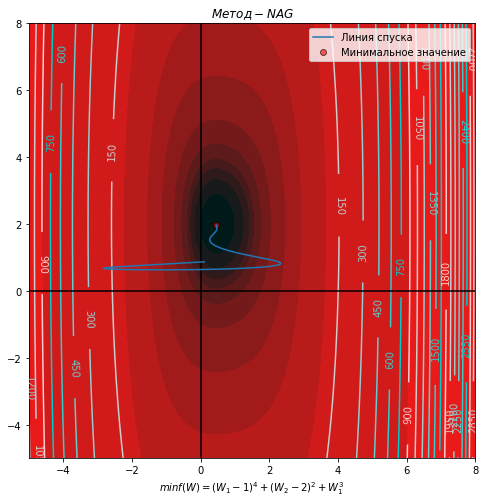

In [55]:
nag = Gradient_NAG()
w, x, y, i = nag.gradient_NAG()
print("\n=======================Расчет методом NAG=======================\n")
print(f"Найденный вектор параметров по градиентному методу NAG {w}")
print(f"Минимум целевой функции {Gradient.f_n2(w)}")
if (i < Gradient.max_iter):
    Gradient.plt_Gradient(x, y, i, "Метод-NAG")

In [56]:
class Gradient_RMSProp(Gradient):
    def gradient_RMSProp(self):
        """
            @:doc "Функция расчёта градиента методом RMSProp
           ========================================================
            :return: возвращает массив с рассчитанными параметрами
        """
        W = np.random.rand(2)  # Инициализация вектора искомых параметров W случайными числами от 0 до 1
        x = [W[0]]
        y = [W[1]]  # Массив координаты y для построения графика
        G = np.random.rand(
            2)  # Инициализация вектора квадратов градиентов экспоненциальной случайными числами от 0 до 1
        W_prev = np.array([10, 10])  # Начальный вектор параметров для предыдущей итерации
        gamma = 1 - self.lambd  # Дисконтирующий множитель позволяет сохранить некоторый небольшой «хвост».  lambda -темп забывания;
        for i in range(self.max_iter + 1):  # цикл для расчета вектора искомых параметров
            # Выхода из цикла при условии: разница между предыдущими значениями W и текущими будет меньше epsilon;
            if (np.absolute(np.linalg.norm(W - W_prev)) <= self.epsilon):
                print(f"Решение найдено,{i + 1} итераций")
                break
            # Выхода из цикла при условии: количество итераций достигает значения max_iter (решение не найдено).
            if (i == self.max_iter):
                print(f"Решение за {i + 1} не найдено")
                print(f"Точность решения за {i + 1} итераций = ", np.absolute(np.linalg.norm(W - W_prev)))
                break
            W_prev = W  #Присваиваем переменной значение на предыдущей итерации текущим
            Grad_W = Gradient.gradient_n2(W)  #Расчет вектора градиентов
            G = gamma * G + (
                        1 - gamma) * Grad_W * Grad_W  # Расчет усредненный вектор квадратов градиентов экспоненциальной скользящей средней
            W = W_prev - (1 - gamma) * Grad_W / np.sqrt(G + self.epsilon)  # Градиентный шаг
            x.append(W[0])
            y.append(W[1])
            self.iter = i  # Записываем значение текущей итерации
        return W, x, y, len(x)

Решение найдено,24 итераций

=======================Расчет методом RMSProp=======================

Найденный вектор параметров по градиентному методу RMSProp [0.45913774 1.99883272]
Минимум целевой функции 0.18236598711694824


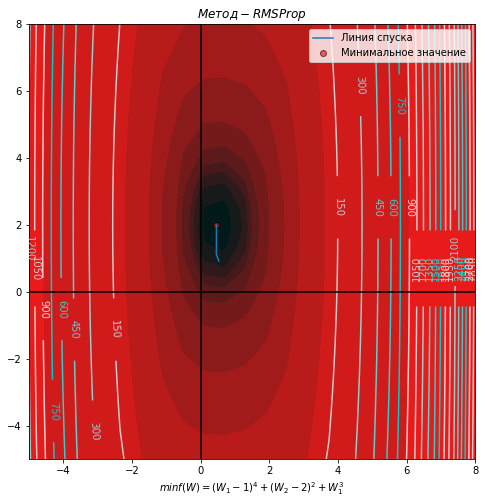

In [57]:
rmsProp = Gradient_RMSProp()
w, x, y, i = rmsProp.gradient_RMSProp()
print("\n=======================Расчет методом RMSProp=======================\n")
print(f"Найденный вектор параметров по градиентному методу RMSProp {w}")
print(f"Минимум целевой функции {Gradient.f_n2(w)}")
if (i < Gradient.max_iter):
    Gradient.plt_Gradient(x, y, i, "Метод-RMSProp")

In [58]:
class Gradient_AdaDelta(Gradient):
    def gradient_AdaDelta(self):
        """
        @:doc "Функция расчёта градиента методом AdaDelta
       ========================================================
        :return: возвращает массив с рассчитанными параметрами
        """
        # Рассчитываем частные производные
        W = np.random.rand(2)  # Инициализация вектора искомых параметров W случайными числами от 0 до 1
        x = [W[0]]  # Массив координаты x для построения графика
        y = [W[1]]  # Массив координаты y для построения графика
        G = np.random.rand(
            2)  # Инициализация вектора квадратов градиентов экспоненциальной случайными числами от 0 до 1
        W_prev = np.array([10, 10])  # Начальный вектор параметров для предыдущей итерации
        for i in range(self.max_iter + 1):  # цикл для расчета вектора искомых параметров
            # Выхода из цикла при условии: разница между предыдущими значениями W и текущими будет меньше epsilon;
            if (np.absolute(np.linalg.norm(W - W_prev)) <= self.epsilon):
                print(f"Решение найдено,{i + 1} итераций")
                break
            # Выхода из цикла при условии: количество итераций достигает значения max_iter (решение не найдено).
            if (i == self.max_iter):
                print(f"Решение за {i + 1} не найдено")
                print(f"Точность решения за {i + 1} итераций = ", np.absolute(np.linalg.norm(W - W_prev)))
            W_prev = W  #Присваиваем переменной значение на предыдущей итерации текущим
            Grad_W = Gradient.gradient_n2(W)  #Расчет вектора градиентов
            G = self.alpha * G + (
                        1 - self.alpha) * Grad_W * Grad_W  # Расчет усредненный вектор квадратов градиентов экспоненциальной скользящей средней
            self.delta = Grad_W * (np.sqrt(self.Delta) + self.epsilon) / (np.sqrt(G) + self.epsilon)
            self.Delta = self.alpha * self.Delta + (1 - self.alpha) * self.delta * self.delta
            W = W - self.delta  # Градиентный шаг
            x.append(W[0])
            y.append(W[1])
            self.iter = i  # Записываем значение текущей итерации
        return W, x, y, len(x)

Решение найдено,26 итераций

=======================Расчет методом AdaDelta=======================

Найденный вектор параметров по градиентному методу AdaDelta [0.45921047 1.99637071]
Минимум целевой функции 0.18237777976190184


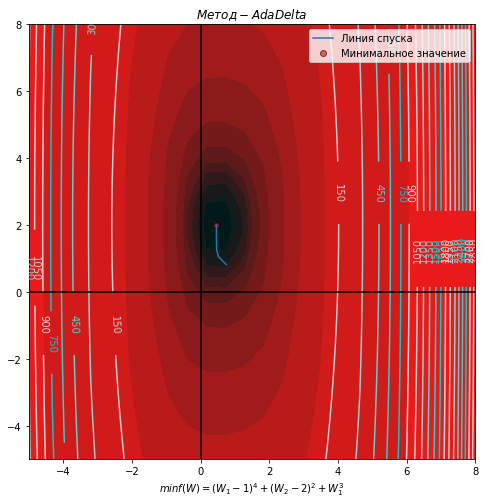

In [59]:
adaDelta = Gradient_AdaDelta()
w, x, y, i = adaDelta.gradient_AdaDelta()
print("\n=======================Расчет методом AdaDelta=======================\n")
print(f"Найденный вектор параметров по градиентному методу AdaDelta {w}")
print(f"Минимум целевой функции {Gradient.f_n2(w)}")
if (i < Gradient.max_iter):
    Gradient.plt_Gradient(x, y, i, "Метод-AdaDelta")

In [60]:
class Gradient_Adam(Gradient):
    def gradient_Adam(self):
        """
        @:doc "Функция расчёта градиента методом Adam
       ========================================================
        :return: возвращает массив с рассчитанными параметрами
        """
        W = np.random.rand(2)  # Инициализация вектора искомых параметров W случайными числами от 0 до 1
        x = [W[0]]  # Массив координаты x для построения графика
        y = [W[1]]  # Массив координаты y для построения графика
        G = np.random.rand(
            2)  # Инициализация вектора квадратов градиентов экспоненциальной случайными числами от 0 до 1
        V = np.random.rand(2)  # Инициализация промежуточного вектора V случайными числами от 0 до 1
        W_prev = np.array([10, 10])  # Начальный вектор параметров для предыдущей итерации
        gamma = 1 - self.lambd  # Дисконтирующий множитель позволяет сохранить некоторый небольшой «хвост».  lambda -темп забывания;
        for i in range(self.max_iter + 1):  # цикл для расчета вектора искомых параметров
            # Выхода из цикла при условии: разница между предыдущими значениями W и текущими будет меньше epsilon;
            if (np.absolute(np.linalg.norm(W - W_prev)) <= self.epsilon):
                print(f"Решение найдено,{i + 1} итераций")
                break
            # Выхода из цикла при условии: количество итераций достигает значения max_iter (решение не найдено).
            if (i == self.max_iter):
                print(f"Решение за {i + 1} не найдено")
                print(f"Точность решения за {i + 1} итераций = ", np.absolute(np.linalg.norm(W - W_prev)))
                break
            W_prev = W  #Присваиваем переменной значение на предыдущей итерации текущим
            Grad_W = Gradient.gradient_n2(W)  #Расчет вектора градиентов
            V = gamma * V + (1 - gamma) * Grad_W  # Расчет промежуточного значения
            G = self.alpha * G + (1 - self.alpha) * Grad_W * Grad_W
            v = V / (1 - gamma ** (self.iter + 1))
            g = G / (1 - self.alpha ** (self.iter + 1))
            W = W_prev - self.rate * v / (np.sqrt(g) + self.epsilon)  #Градиентный шаг
            x.append(W[0])
            y.append(W[1])
            self.iter = i  # Записываем значение текущей итерации
        return W, x, y, len(x)

Решение найдено,393 итераций

=======================Расчет методом Adam=======================

Найденный вектор параметров по градиентному методу Adam [0.45921047 1.91674645]
Минимум целевой функции 0.1892957617625853


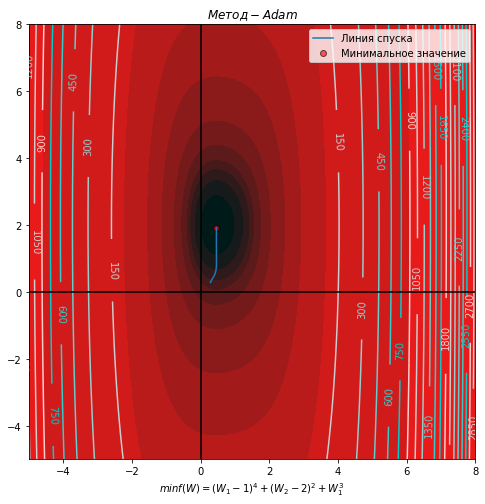

In [61]:
adam = Gradient_Adam()
w, x, y, i = adam.gradient_Adam()
print("\n=======================Расчет методом Adam=======================\n")
print(f"Найденный вектор параметров по градиентному методу Adam {w}")
print(f"Минимум целевой функции {Gradient.f_n2(w)}")
if (i < Gradient.max_iter):
    Gradient.plt_Gradient(x, y, i, "Метод-Adam")

In [62]:
#Массив для хранения числа итераций
classicIteration = []
momentumIteration = []
nagIteration = []
rmsPropIteration = []
adadeltaIteration = []
adamIteration = []
for i in range(100):  # Цикл для запуска каждого градиентного метода по 100 раз
    # Вызов у каждого класса метода расчета вектора искомых параметров
    classic.gradient_classic()
    momentum.gradient_Momentum()
    nag.gradient_NAG()
    rmsProp.gradient_RMSProp()
    adaDelta.gradient_AdaDelta()
    adam.gradient_Adam()
    # Заполнение массивов колличеством итераций по каждому методу
    classicIteration.append(classic.iter)
    momentumIteration.append(momentum.iter)
    nagIteration.append(nag.iter)
    rmsPropIteration.append(rmsProp.iter)
    adadeltaIteration.append(adaDelta.iter)
    adamIteration.append(adam.iter)
""" Построение "Ящик с усами" (диаграмма размаха)"""
listIter = [classicIteration, momentumIteration, nagIteration, rmsPropIteration, adadeltaIteration, adamIteration]
labels = ["Классический", "Momentum", "NAG", "RMSProp", "AdaDelta", "Adam", ]
fig1, ax1 = plt.subplots(figsize=(15, 9))
ax1.set_title("Ящик с усами (диаграмма размаха)")
ax1.boxplot(listIter, vert=True, labels=labels)
plt.ylabel("Число итераций")
plt.grid(True)
plt.show()

Решение найдено,182 итераций
Решение найдено,213 итераций
Решение найдено,206 итераций
Решение найдено,27 итераций
Решение найдено,24 итераций
Решение найдено,441 итераций
Решение найдено,164 итераций
Решение найдено,201 итераций
Решение найдено,216 итераций
Решение найдено,25 итераций
Решение найдено,14 итераций
Решение найдено,419 итераций
Решение найдено,165 итераций
Решение найдено,178 итераций
Решение найдено,206 итераций
Решение найдено,35 итераций
Решение найдено,10 итераций
Решение найдено,422 итераций
Решение найдено,168 итераций
Решение найдено,234 итераций
Решение найдено,191 итераций
Решение найдено,27 итераций
Решение найдено,11 итераций
Решение найдено,4 итераций
Решение найдено,153 итераций
Решение найдено,193 итераций
Решение найдено,237 итераций
Решение найдено,31 итераций
Решение найдено,14 итераций
Решение найдено,2 итераций
Решение найдено,170 итераций
Решение найдено,209 итераций
Решение найдено,210 итераций
Решение найдено,25 итераций
Решение найдено,20 итераций
Р

D:\YandexDisk\Project\Python\Methods_Optimizations\venv\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in multiply


Решение найдено,399 итераций
Решение найдено,4 итераций
Решение найдено,177 итераций
Решение найдено,235 итераций
Решение найдено,222 итераций


KeyboardInterrupt: 

In [72]:
w1, x1, y1, i1 = classic.gradient_classic()
w2, x2, y2, i2 = momentum.gradient_Momentum()
w3, x3, y3, i3 = nag.gradient_NAG()
w4, x4, y4, i4 = rmsProp.gradient_RMSProp()
w5, x5, y5, i5 = adaDelta.gradient_AdaDelta()
w6, x6, y6, i6 = adam.gradient_Adam()

Решение найдено,175 итераций
Решение найдено,236 итераций
Решение найдено,228 итераций
Решение найдено,34 итераций
Решение найдено,17 итераций
Решение найдено,393 итераций


D:\YandexDisk\Project\Python\Methods_Optimizations\venv\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in multiply
